In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:
df = pd.read_csv("train.csv")

In [39]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
df.shape

(891, 12)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The df.info() shows that Age and Cabin columns are missing data.

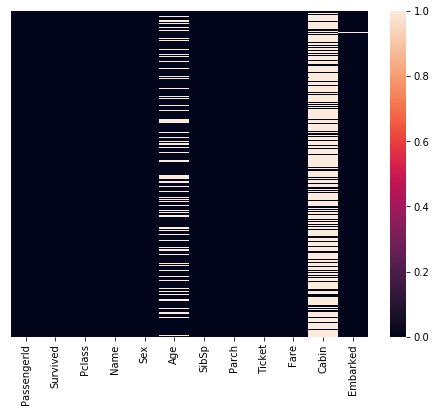

In [42]:
# lets plot to see.
fig = plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), yticklabels=False )

### Looks like Cabin columns has more data missing. The white strips indicate NaN values. The Age columns also has missing data, which can be filled in with average age.

In [43]:
#Making a  dataframe to show which columns has missing value
dmiss = pd.DataFrame(df.isnull().sum()[df.isnull().sum() > 0], columns=["Total"])
dmiss

,Total
Age,177
Cabin,687
Embarked,2


Text(0.5,1,'Sum of missing values')

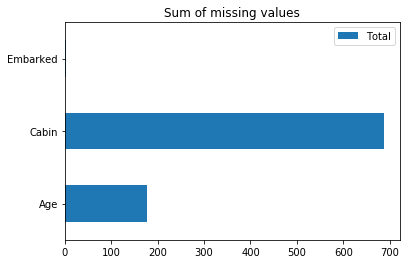

In [44]:
#Lets make a barplot to visualize it 
dmiss.plot.barh()
plt.title("Sum of missing values")

In [45]:
#Calculating the number of data that are missing from Cabin

df["Cabin"].isnull().sum()

687

In [89]:
# 687 values are missing from Cabin. So lets drop the Cabin column
df.drop(columns =["Cabin"], inplace = True)


In [47]:
df.columns
#We can see that the column is dropped

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [48]:
sns.set_style(style = "whitegrid")

In [49]:
# Calculating how many survived and died
df.groupby("Survived").PassengerId.count()

Survived
0    549
1    342
Name: PassengerId, dtype: int64

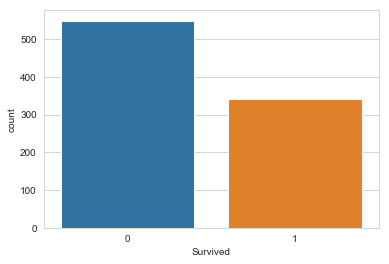

In [50]:
#visually analyzing number of survived vs those who didnot make it.
sns.countplot(x = "Survived", data = df, )


In [51]:
#lets see how many men and women survived and died

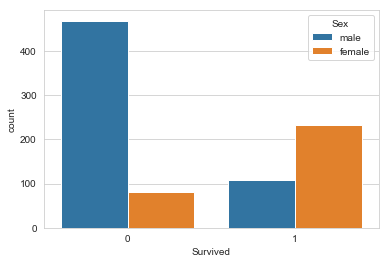

In [52]:
sns.countplot(x = "Survived", data = df, hue = "Sex")
#looks like more men died than women, and among survivor(denoted by 1), more women survived

In [53]:
# Number of male vs female on board the ship.

df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Text(0.5,1,'Sex Distribution')

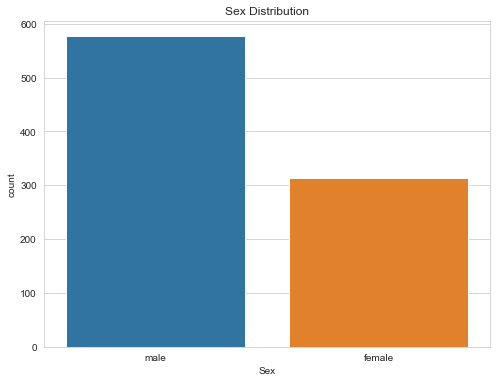

In [116]:
plt.figure(figsize=(8,6))
sns.countplot(x = "Sex", data = df, hue )
plt.title("Sex Distribution")

In [55]:
#To see the relationship between survived and sex, lets create a table 

df.groupby(["Survived", "Sex"]).PassengerId.count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

### Lets see number of people according to the class of tickets they have

In [56]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### It shows that the number of people in class 3 are more than there are in other classes combined 

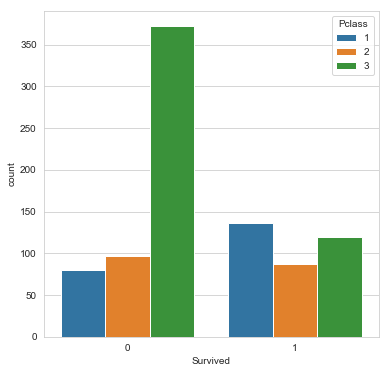

In [58]:
#Visualizing the data for people who survived and the classes they were in.
plt.figure(figsize=(6,6))
sns.countplot(x= "Survived", data = df, hue = "Pclass")

### The above grph shows that the people in 3rd class were more of the casualty. People on first class survived more.

In [59]:
#Lets build a table that shows how many Pclass passenger survived and died

PclSur = df.groupby(["Survived", "Pclass"]).PassengerId.count().unstack()

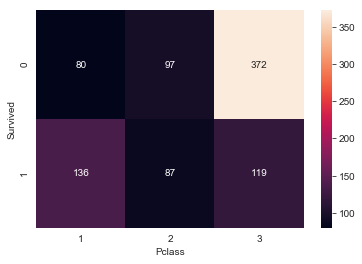

In [60]:
sns.heatmap(PclSur, annot= True, fmt="d")

In [61]:
#table representing the above heatmap
PclSur

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


Let's have a look at the Age column and see what is the maximum and minimum age that survived or died

In [62]:
df["Age"].isnull().sum()

177

In [63]:
# Lets see what was the maximum and minimum age of those survived and died.

In [64]:
df.groupby('Survived').Age.agg(['max','min'])

,max,min
Survived,,
0,74.0,1.00
1,80.0,0.42


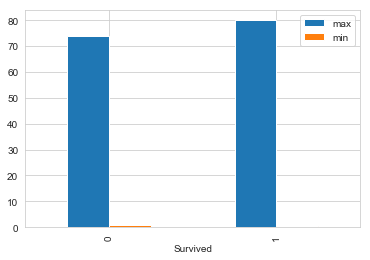

In [65]:
df.groupby('Survived').Age.agg(['max','min']).plot.bar()

### The oldest person to survive was 80 years old and the oldest person who died was 74'''

In [66]:
display(df[df["Age"] == df["Age"].max()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,S


### Let us plot a histogram to see the age distribution

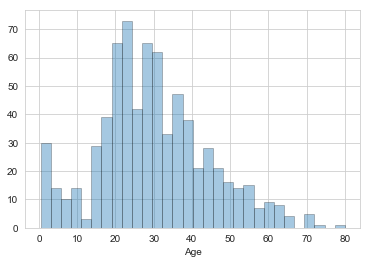

In [67]:
sns.distplot(df["Age"].dropna(), kde = False, bins = 30, hist_kws=dict(edgecolor="k", linewidth=0.6) )

Ths graph looks bimodal in nature. But it can be seen that the more number of people were in their 20s to 30s

C:\Users\Pralav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


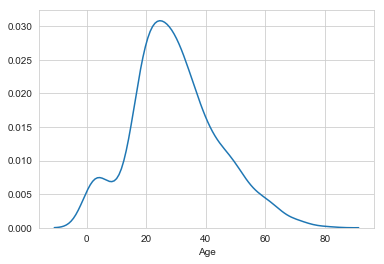

In [68]:
sns.distplot(df["Age"].dropna(), hist= False)

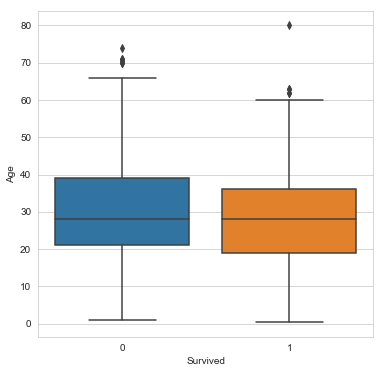

In [114]:

plt.figure(figsize=(6,6))
sns.boxplot(x = "Survived", y = "Age", data =df )

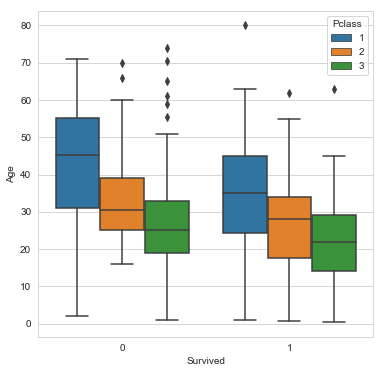

In [69]:
# We can use a boxplot to see the distribution of the ages that survived. The median value for people who didnot survive seems
#bigger that the other group.
plt.figure(figsize=(6,6))
sns.boxplot(x = "Survived", y = "Age", data =df, hue = "Pclass", )

## people who survived were older than those who didnot. 

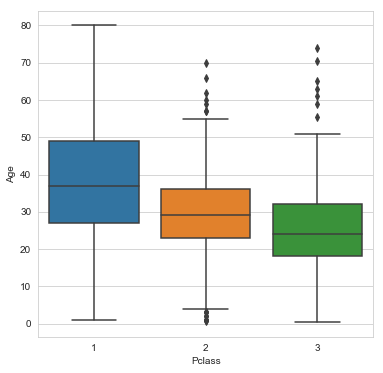

In [71]:
plt.figure(figsize=(6,6))
sns.boxplot(x = "Pclass", y = "Age", data =df )

### The above plot shows that the Pclass 1 passengers had a heighest median age as compared to other two classes.The 3rd class passengers seems to be younger people. May be wealth paid an important role as older people could afford 1st class tickets as opposed to younger people at that time.

C:\Users\Pralav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


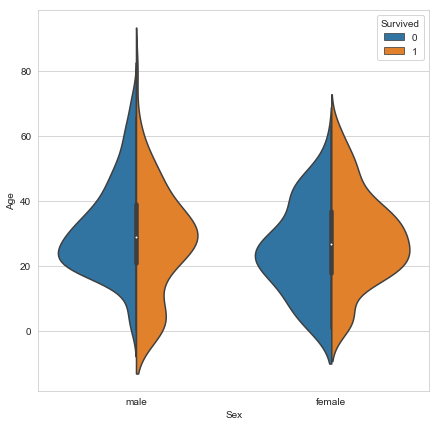

In [131]:
plt.figure(figsize=(7,7))
sns.violinplot(x = "Sex", y="Age", data =df, hue = "Survived", split = True )

### This plot indicates that the average age for the male who survived and died were the same. But for the women who were in their 20-late 30 have survived more.  The same is not true for male. Younger males have died more 

In [73]:
#df.head()

### Fare

Lets see some aggregrate functions to see the amount  of Fare people have payed according to the class they boarded.

In [74]:
Agg= df.groupby("Pclass").Fare.agg(["max", "min", "mean", "std"])

In [75]:
Agg

,max,min,mean,std
Pclass,,,,
1,512.3292,0.0,84.154687,78.380373
2,73.5000,0.0,20.662183,13.417399
3,69.5500,0.0,13.675550,11.778142


C:\Users\Pralav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


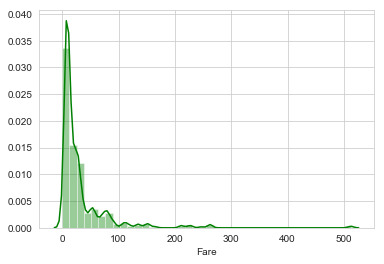

In [122]:
#Lets plot a histogram to see the distribution of fare. 

sns.distplot(df["Fare"], bins = 40, kde = True, color = "g")

### Seems like the max 512  is an outlier. The average fare seems like it is centered around $30. 

[[]]

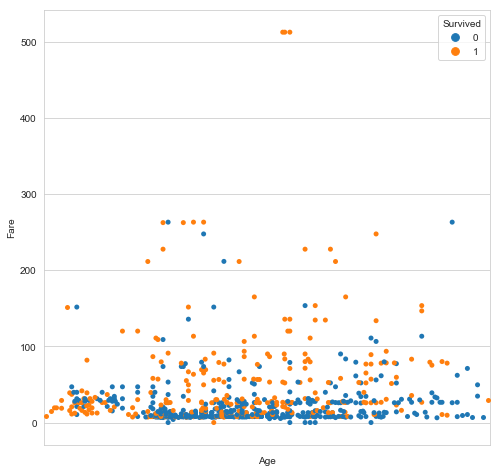

In [77]:
plt.figure(figsize=(8,8))
ax = sns.swarmplot(x ="Age", y ="Fare", data = df, hue = "Survived")
ax.set(xticklabels=[])


### This swarmplot also suggests that those who paid high(Pclass ==1) had a higher rate of survival. 

### EDA for embarked (stations used by passengers)


In [100]:
df["Embarked"].shape

(891,)

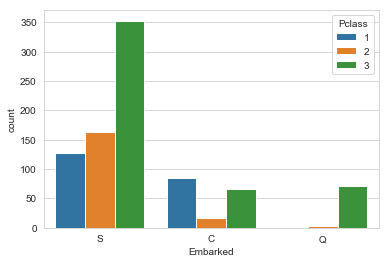

In [94]:
sns.countplot(x= "Embarked", data = df, hue = "Pclass" )

### More people had embarked from Southhampton than the other two combined.

In [112]:
df.groupby(["Embarked", "Survived", "Pclass"]).PassengerId.count().unstack()

Pclass              1   2    3
Embarked Survived             
C        0         26   8   41
         1         59   9   25
Q        0          1   1   45
         1          1   2   27
S        0         53  88  286
         1         74  76   67

### The table above shows that more people from Southhampton died . The survival rate of people in the 3rd class was very low from Southhampton.  The survival ration for 2nd class for all stations seems 50/50. As earlier noted the survival for the 1st class is higher for all stations

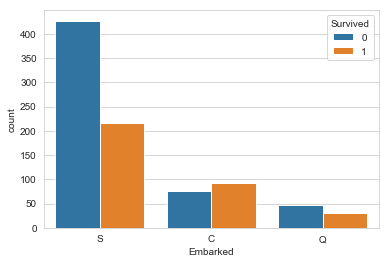

In [142]:
sns.countplot('Embarked',data = df, hue = "Survived")

### Parch Parents and Children

C:\Users\Pralav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Probabilty of Survival')

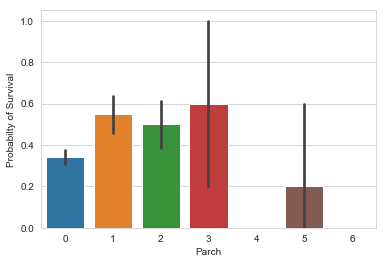

In [149]:
sns.barplot("Parch", data = df, y = "Survived")
plt.ylabel("Probabilty of Survival" )

### it shows that the people who were less in number (parents+children(0-3)) had a higher chance of survival

If we add Parch and sibling spouse(SibSp), we will get the total number of family members

In [155]:
df["Total_Family"] = df["Parch"] + df["SibSp"] + 1

In [163]:
df["Total_Family"].nunique()

9

C:\Users\Pralav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Probabilty of Survival')

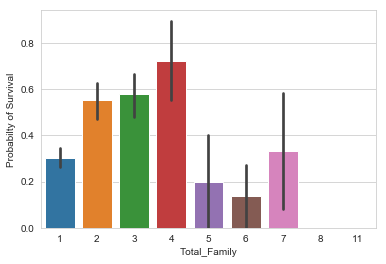

In [180]:
sns.barplot(x="Total_Family", data = df, y = "Survived")
plt.ylabel("Probabilty of Survival" )

### Groups of People who were lesser in number had survived more than larger groups of people 

In [200]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Total_Family', 'Title'],
      dtype='object')

In [238]:
## Getting title from the names of the passengers
Mar = df.Name.str.split(",", expand =True)[1]
df["Title"] = Mar.str.split(".", expand = True)[0]

In [239]:
df["Title"].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [256]:
df["Title"].unique()

array([' Mr', ' Miss', ' Master', 'others', ' Jonkheer'], dtype=object)

In [257]:
## Since there are 17 different entries for Title, grouping them would br beneficial.
df["Title"].replace([' Don', ' Rev', ' Dr', ' Major', ' Lady', ' Sir', ' Col', ' Capt',' the Countess', ' Jonkheer'
                                        , ' Dona'], 'others', inplace=True)


In [254]:
df["Title"].replace([' Mme',' Ms',' Mlle',' Mrs'],' Miss',inplace=True)

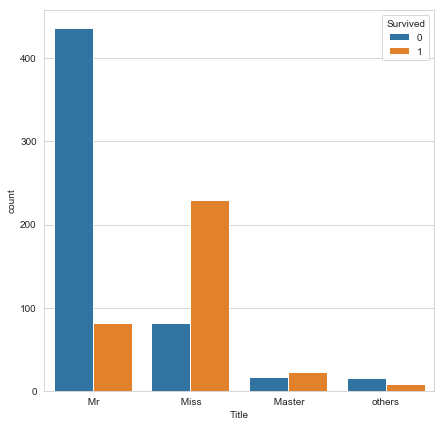

In [259]:
plt.figure(figsize=(7,7))
sns.countplot(x = "Title", data = df, hue = "Survived")

### The above plot shows that the females had survived mre than any other gender. Also children (Master) had great probabilty of survival.

# Abstract
## Feamles had higher chances of survival than men
## Pclass played a higher role in survival as 1st class passengers had higher survival rate
## Pclass had older passengers
## Families with lower number f members had higher chances of survival.
## people who paid higher fares had survuved more
## Interestingly people who embarked from Chebourg had a higher chances of survival
## Out of all the features Cabin had to be dropped because it contains too many nan
## men between 20s-40s have less survival rates than women
## Children had higher chances of survival